In [15]:
# import our usual things
%matplotlib inline
import cartopy
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import ipyleaflet
import numpy as np
import bqplot
import ipywidgets
import contextily as ctx

In [3]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

In [4]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
gdf_councils = gdf_councils.to_crs(epsg=3857)

NameError: name 'ctx' is not defined

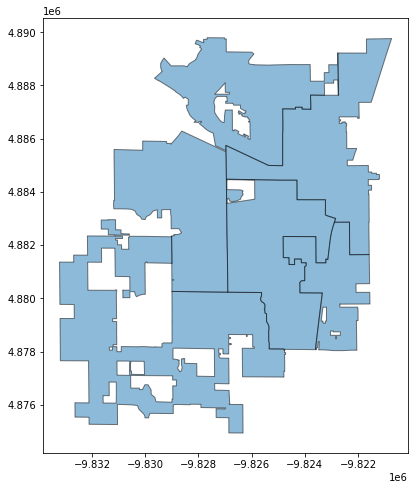

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')

ctx.add_basemap(ax=ax)

plt.show()

In [7]:
gdf_parking = geopandas.read_file('https://opendata.arcgis.com/datasets/63cddb4fcb4842be9b10b9396482bd1d_30.geojson')

In [8]:
gdf_parking.head()

,OBJECTID,MeterLoc,HOURS,RATE,DAYS,WRM,ZONEID,ZONEDESC,Notes,FACILITYID,...,BlockStreet,Enforcement_Zone,Enforcement_Time,Enforcement_Days,MAX_TIME,NO_MAX,NO_CHARGE_1,NO_PARKING,NO_CHARGE_2,geometry
0,1,624,14.0,0.75,6.0,63.0,CP75,CAMPUS $.75/HR,None,1,...,500 S Third St,3.0,7:00 AM - 21:00 PM,Monday - Saturday,2 hr max in 3 hr period,None,No Charge 9PM - 7AM,None,None,POINT (-88.23547 40.11242)
1,2,617,14.0,0.75,6.0,63.0,CP75,CAMPUS $.75/HR,None,2,...,200 S Third St,2.0,7:00 AM - 21:00 PM,Monday - Saturday,10 hr max,None,No Charge 9PM - 7AM,None,None,POINT (-88.23538 40.11519)
2,3,626,14.0,0.75,6.0,63.0,CP75,CAMPUS $.75/HR,None,3,...,500 S Third St,3.0,7:00 AM - 21:00 PM,Monday - Saturday,2 hr max in 3 hr period,None,No Charge 9PM - 7AM,None,None,POINT (-88.23547 40.11229)
3,4,628,14.0,0.75,6.0,63.0,CP75,CAMPUS $.75/HR,None,4,...,500 S Third St,3.0,7:00 AM - 21:00 PM,Monday - Saturday,2 hr max in 3 hr period,None,No Charge 9PM - 7AM,None,None,POINT (-88.23547 40.11218)
4,5,630,14.0,0.75,6.0,63.0,CP75,CAMPUS $.75/HR,None,5,...,500 S Third St,3.0,7:00 AM - 21:00 PM,Monday - Saturday,2 hr max in 3 hr period,None,No Charge 9PM - 7AM,None,None,POINT (-88.23546 40.11207)


In [9]:
gdf_parking['ZONEID'].unique()

array(['CP75', 'CP1.50', 'ES25', 'CP1.00', 'CP2.00', 'DT25', 'DT75',
       'DT50', 'DT1.50', 'CP50', ' ', 'DT1.00', None], dtype=object)

In [10]:
gdf_parking.loc[gdf_parking['ZONEID'].isnull(), 'ZONEID'] = 'Not specified'

In [11]:
gdf_parking['ZONEID'].unique()

array(['CP75', 'CP1.50', 'ES25', 'CP1.00', 'CP2.00', 'DT25', 'DT75',
       'DT50', 'DT1.50', 'CP50', ' ', 'DT1.00', 'Not specified'],
      dtype=object)

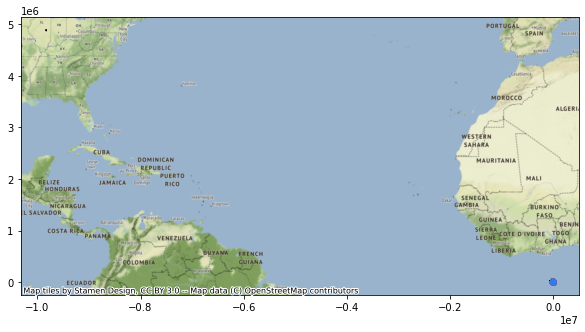

In [16]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_parking.plot(column='ZONEDESC', ax=ax, cmap='rainbow')

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

C:\Users\david\anaconda3\envs\DataViz\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 32 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


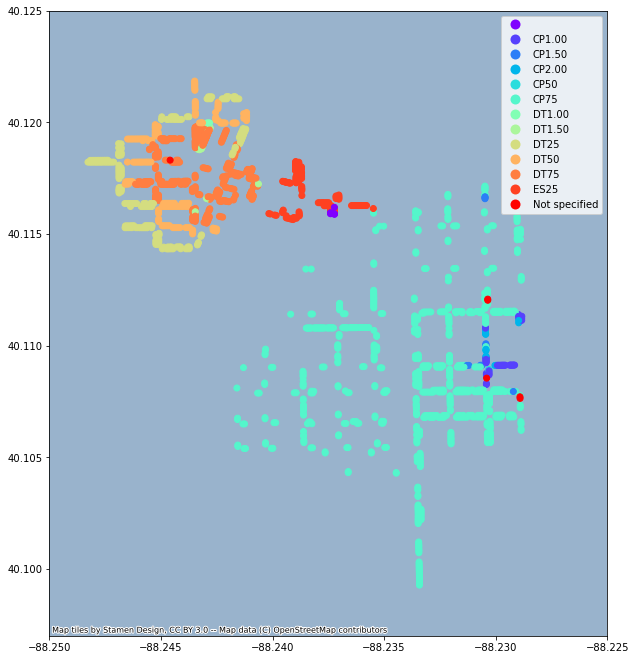

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10,15))

ax.set_xlim(-88.250, -88.225)
ax.set_ylim(40.097, 40.125)

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_parking.plot(column='ZONEID', ax=ax, cmap='rainbow', categorical=True, legend=True)

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

In [18]:
@ipywidgets.interact(btype=gdf_parking['ZONEID'].unique())
def my_geopandas_plot(btype):
    gdf_parking_subset = gdf_parking.loc[gdf_parking['ZONEID']==btype] # our subsetted dataframe

    fig, ax = plt.subplots(1,1,figsize=(10,10))

    ax.set_xlim(-88.250, -88.225)
    ax.set_ylim(40.097, 40.125)

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
    gdf_parking_subset.plot(column='ZONEID', ax=ax, cmap='rainbow', categorical=True, legend=True) # look what changes

    ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

    plt.show()

interactive(children=(Dropdown(description='btype', options=('CP75', 'CP1.50', 'ES25', 'CP1.00', 'CP2.00', 'DT…

In [20]:
gdf_trafficsign = geopandas.read_file('https://opendata.arcgis.com/datasets/f5aaae43ed6642cc944117f4f4221adb_37.geojson')

In [21]:
gdf_trafficsign.head()

,OBJECTID,Sign_Type,Size_,Supplement,Sign_Post,Year_Insta,Category,Notes,MUTCD,Ownership,FACILITYID,Schools,Location_Adjusted,Replacement_Zone,Sign_Text,Set_ID,FieldVerifiedDate,geometry
0,1,Streetname - Mast Arm,"16"" X 42""",,Traffic Signal Mast Arm,,Streetname,,D3-1,Champaign,1,None,AERIAL,L,Mercury Dr,1,None,POINT (-88.23928 40.14925)
1,2,Streetname - Mast Arm,"16"" X 42""",,Traffic Signal Mast Arm,,Streetname,,D3-1,Champaign,2,None,AERIAL,L,N Market St,2,None,POINT (-88.23928 40.14945)
2,3,No Outlet,"30"" X 30""",,Punched Telespar,2010,Warning,,W14-2,Champaign,3,None,AERIAL,E,None,3,None,POINT (-88.29237 40.09312)
3,4,No Outlet,"30"" X 30""",,Punched Telespar,2010,Warning,,W14-2,Champaign,4,None,AERIAL,E,None,4,None,POINT (-88.29505 40.09509)
4,5,No Outlet,"30"" X 30""",,Punched Telespar,2010,Warning,,W14-2,Champaign,5,None,AERIAL,E,None,5,None,POINT (-88.28499 40.09760)


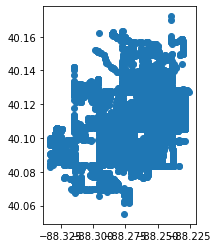

In [23]:
gdf_trafficsign.plot()

In [24]:
gdf_trafficsign['Category'].unique()

array(['Streetname', 'Warning', 'Parking', 'Regulatory', 'School',
       'Guide', 'MTD', 'Custom', 'Object Marker', 'Parking Deck', ' '],
      dtype=object)

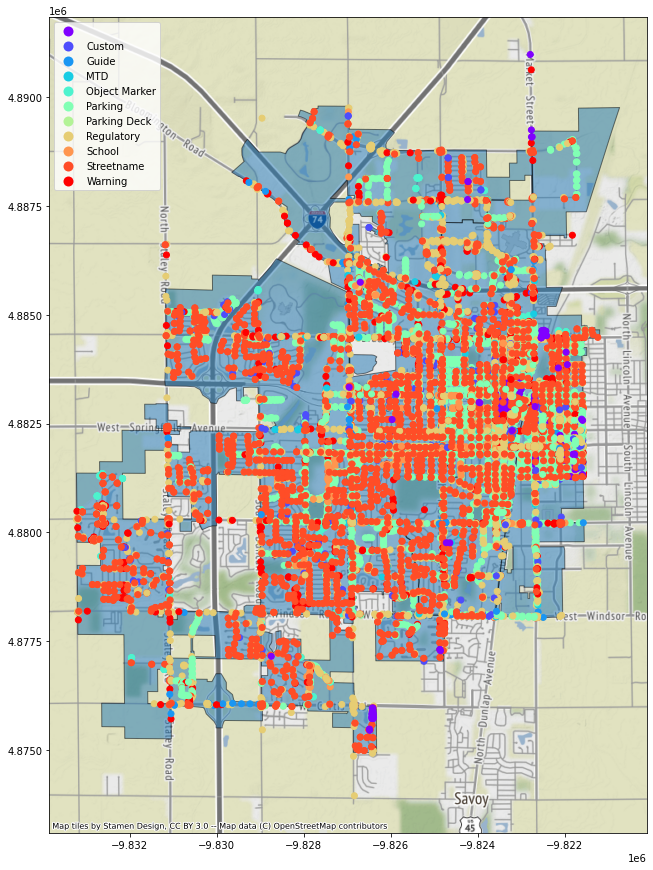

In [29]:
fig, ax = plt.subplots(1,1,figsize=(15,15))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_trafficsign.plot(column='Category', ax=ax, cmap='rainbow', categorical=True, legend=True)

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

In [30]:
@ipywidgets.interact(btype=gdf_trafficsign['Category'].unique())
def my_geopandas_plot(btype):
    gdf_trafficsign_subset = gdf_trafficsign.loc[gdf_trafficsign['Category']==btype] # our subsetted dataframe

    fig, ax = plt.subplots(1,1,figsize=(10,10))

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
    gdf_trafficsign_subset.plot(column='Category', ax=ax, cmap='rainbow', categorical=True, legend=True) # look what changes

    ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

    plt.show()

interactive(children=(Dropdown(description='btype', options=('Streetname', 'Warning', 'Parking', 'Regulatory',…